In [16]:
%reset
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import load_boston
from sklearn import preprocessing
import seaborn as sns
from numpy import dot
np.random.seed(678)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [31]:
# create the first data
data_1 = np.array([
    [3,1,1],
    [-1,3,1]
])

w_1_1 = data_1.dot(data_1.T)
e_value_1_1,e_vector_1_1 = np.linalg.eigh(w_1_1)

w_1_2 = data_1.T.dot(data_1)
e_value_1_2,e_vector_1_2 = np.linalg.eigh(w_1_2)

print("Original Data Shape: ", data_1.shape)
print('dot(A,A.T) Eigen Value: ',e_value_1_1.shape)
print('dot(A,A.T) Eigen Vector: ',e_vector_1_1.shape)
print('dot(A.T,A) Eigen Value: ',e_value_1_2.shape)
print('dot(A.T,A) Eigen Vector: ',e_vector_1_2.shape)

Original Data Shape:  (2, 3)
dot(A,A.T) Eigen Value:  (2,)
dot(A,A.T) Eigen Vector:  (2, 2)
dot(A.T,A) Eigen Value:  (3,)
dot(A.T,A) Eigen Vector:  (3, 3)


In [39]:
# Sort the eigen vector via the eigen value ranks
idx_1_1 = e_value_1_1.argsort()[::-1]   
e_value_1_1 = e_value_1_1[idx_1_1]
e_vector_1_1 = e_vector_1_1[:,idx_1_1]

idx_1_2 = e_value_1_2.argsort()[::-1]   
e_value_1_2 = e_value_1_2[idx_1_2]
e_vector_1_2 = e_vector_1_2[:,idx_1_2]

# Campare the eigen vectors and see if their non zero elements are equal
rows_1_1 = np.nonzero(e_value_1_1)
rows_1_2 = np.nonzero(e_value_1_2)
non_zero_1_1 = e_value_1_1[rows_1_1].copy()
non_zero_1_2 = e_value_1_2[rows_1_2].copy()


print('Sqrt Root Sum of One : ',np.sqrt(non_zero_1_1**2).sum())
print('Sqrt Root Sum of Two : ',np.sqrt(non_zero_1_2**2).sum())

print('\n---------')
print('Number of Non Zero Eigen Values ', (non_zero_1_1!=0).sum() )
print('Number ofNon Zero Eigen Values ',  (non_zero_1_2!=0).sum() )

print('\n---------')
print('Number of Small Eigen Values ', (non_zero_1_1>1e-5).sum() )
print('Number of Small Eigen Values ',(non_zero_1_2>1e-5).sum() )

print(non_zero_1_1)
print(non_zero_1_2)

Sqrt Root Sum of One :  22.0
Sqrt Root Sum of Two :  22.000000000000007

---------
Number of Non Zero Eigen Values  2
Number ofNon Zero Eigen Values  3

---------
Number of Small Eigen Values  2
Number of Small Eigen Values  2
[12. 10.]
[ 1.20000000e+01  1.00000000e+01 -2.25970772e-15]


------------------
Created Matrix U :  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Created Matrix S :  [[3.46410162 0.         0.        ]
 [0.         3.16227766 0.        ]]
Created Matrix V :  [[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [ 8.94427191e-01 -4.47213595e-01  2.77555756e-16]
 [-1.82574186e-01 -3.65148372e-01  9.12870929e-01]]

------------------
Reconstructed matrix : 
 [[-3. -1. -1.]
 [ 1. -3. -1.]]
Original matrix : 
 [[ 3  1  1]
 [-1  3  1]]


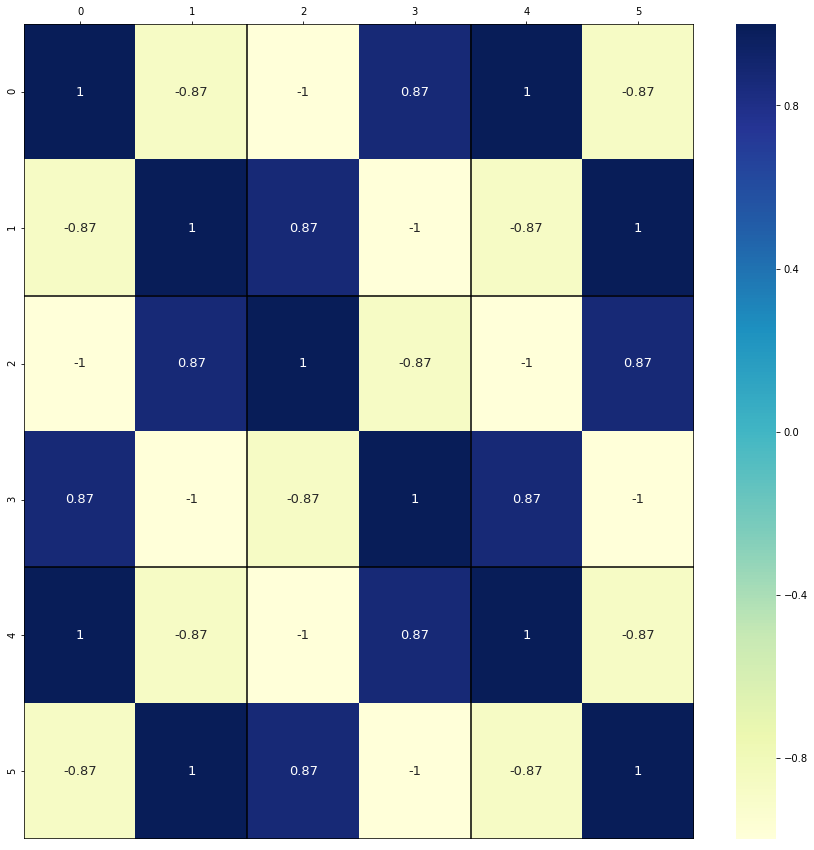

In [30]:
# Create each matrix
U_1 = e_vector_1_1
temp = np.diag(np.sqrt(non_zero_1_1))
S_1 = np.zeros_like(data_1).astype(np.float64)
S_1[:temp.shape[0],:temp.shape[1]] = temp
V_1 = e_vector_1_2.T

print('------------------')
print("Created Matrix U : \n",U_1)
print("Created Matrix S : \n",S_1)
print("Created Matrix V : \n",V_1)

print('\n------------------')
reconstructed_1 = dot(U_1,S_1).dot(V_1)
print("Reconstructed matrix : \n",reconstructed_1)
print("Original matrix : \n",data_1)

df_1 = pd.DataFrame(np.hstack((data_1.T,reconstructed_1.T,-reconstructed_1.T)))
plt.figure(figsize=(15,15))
ax = sns.heatmap(np.around(df_1.corr(),2),annot=True,annot_kws={"size": 13},cmap="YlGnBu")
ax.xaxis.tick_top()
ax.vlines([0,2,4,6], *ax.get_ylim())
ax.hlines([0,2,4,6], *ax.get_xlim())

------------------
Created Matrix U : 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Created Matrix S : 
 [[3.46410162 0.        ]
 [0.         3.16227766]]
Created Matrix V : 
 [[ 0.40824829 -0.89442719]
 [ 0.81649658  0.4472136 ]
 [ 0.40824829  0.        ]]

------------------
Reconstructed matrix : 
 [[ 3.  1.  1.]
 [-1.  3.  1.]]
Original matrix : 
 [[ 3  1  1]
 [-1  3  1]]


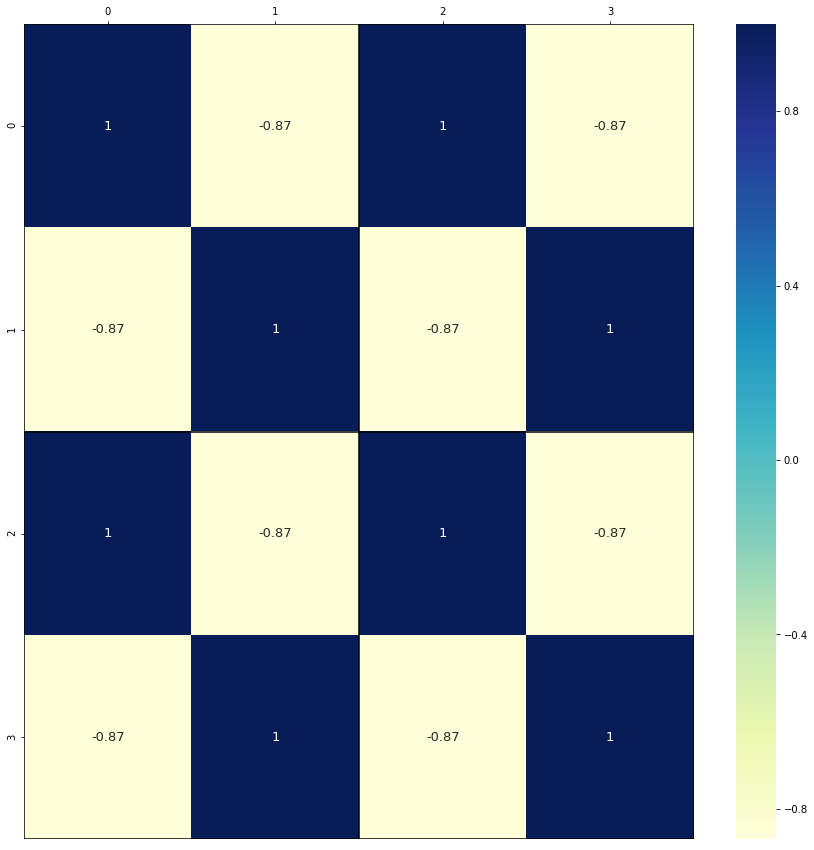

In [35]:
A = np.array([
    [3,1,1],
    [-1,3,1]
])

temp = A.dot(A.T)
S,U = np.linalg.eig(temp)
S = np.diag(np.sqrt(S))
V = A.T.dot(U).dot(np.linalg.inv(S))

print('------------------')
print("Created Matrix U : \n",U)
print("Created Matrix S : \n",S)
print("Created Matrix V : \n",V)

print('\n------------------')
reconstructed_2 = dot(U,S).dot(V.T)
print("Reconstructed matrix : \n",reconstructed_2)
print("Original matrix : \n",data_1)

df_2 = pd.DataFrame(np.hstack((data_1.T,reconstructed_2.T)))
plt.figure(figsize=(15,15))
ax = sns.heatmap(np.around(df_2.corr(),2),annot=True,annot_kws={"size": 13},cmap="YlGnBu")
ax.xaxis.tick_top()
ax.vlines([0,2,4,6], *ax.get_ylim())
ax.hlines([0,2,4,6], *ax.get_xlim())